# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11909 entries, 0 to 11908
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11909 non-null  int64  
 1   Country              11909 non-null  string 
 2   Disaster Group       11909 non-null  string 
 3   Disaster Subgroup    11909 non-null  string 
 4   Disaster Type        11909 non-null  string 
 5   Disaster Subtype     9776 non-null   string 
 6   Disaster Subsubtype  977 non-null    string 
 7   Total Damages        11909 non-null  float64
 8   CPIAUCNS             11909 non-null  float64
 9   CPI Multiplier       11909 non-null  float64
dtypes: float64(3), int64(1), string(6)
memory usage: 1023.4 KB


In [5]:
data.sort_values('Total Damages', ascending = False).head()

,Year,Country,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Total Damages,CPIAUCNS,CPI Multiplier
8505,2011,Japan,Natural,Geophysical,Earthquake,Tsunami,<NA>,240.858523,224.939167,1.146945
2886,1995,Japan,Natural,Geophysical,Earthquake,Ground movement,<NA>,169.298871,152.383333,1.692989
6388,2005,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,165.146380,195.291667,1.321171
7358,2008,China,Natural,Geophysical,Earthquake,Ground movement,<NA>,101.869476,215.302500,1.198464
10730,2017,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,99.983503,245.119583,1.052458


# SPLIT  DISASTER SUBGROUPS

In [6]:
# display unique subgroups
for subgroup in data['Disaster Subgroup'].unique():
    print(subgroup)

Climatological
Geophysical
Hydrological
Meteorological


In [7]:
# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']
geophysical_data = data[data['Disaster Subgroup'] == 'Geophysical']
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()
geophysical_disaster_counts = geophysical_data['Year'].value_counts().sort_index()
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
disaster_counts_index = disaster_counts.index
climatological_disaster_counts_index = climatological_disaster_counts.index
geophysical_disaster_counts_index = geophysical_disaster_counts.index
meteorological_disaster_counts_index = meteorological_disaster_counts.index
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# PLOT DISASTER SUBGROUPS

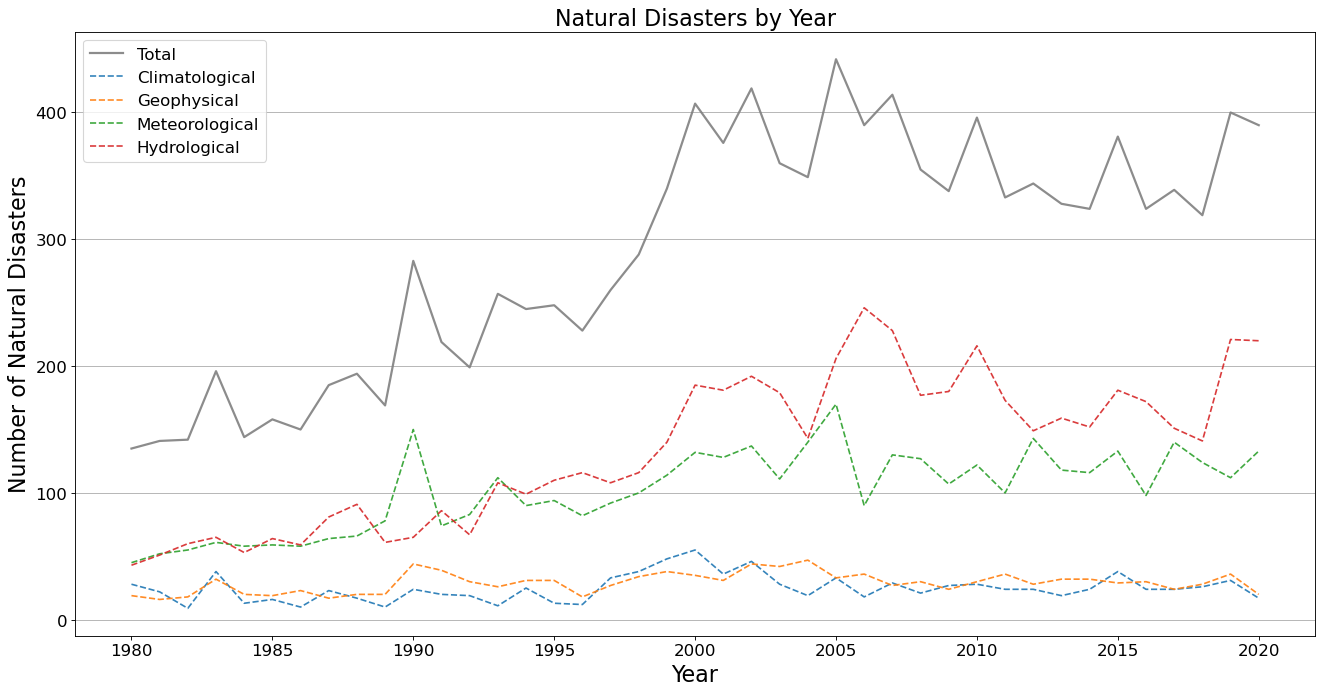

In [8]:
# line plot
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")

ax = plt.gca()

plt.plot(disaster_counts_index, disaster_counts, linewidth=2, color = 'grey', alpha = 0.9)
plt.plot(climatological_disaster_counts_index, climatological_disaster_counts, linestyle = '--', alpha = 0.9)
plt.plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linestyle = '--', alpha = 0.9)
plt.plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linestyle = '--', alpha = 0.9)
plt.plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linestyle = '--', alpha = 0.9)
plt.legend(['Total', 'Climatological', 'Geophysical', 'Meteorological',  'Hydrological'])

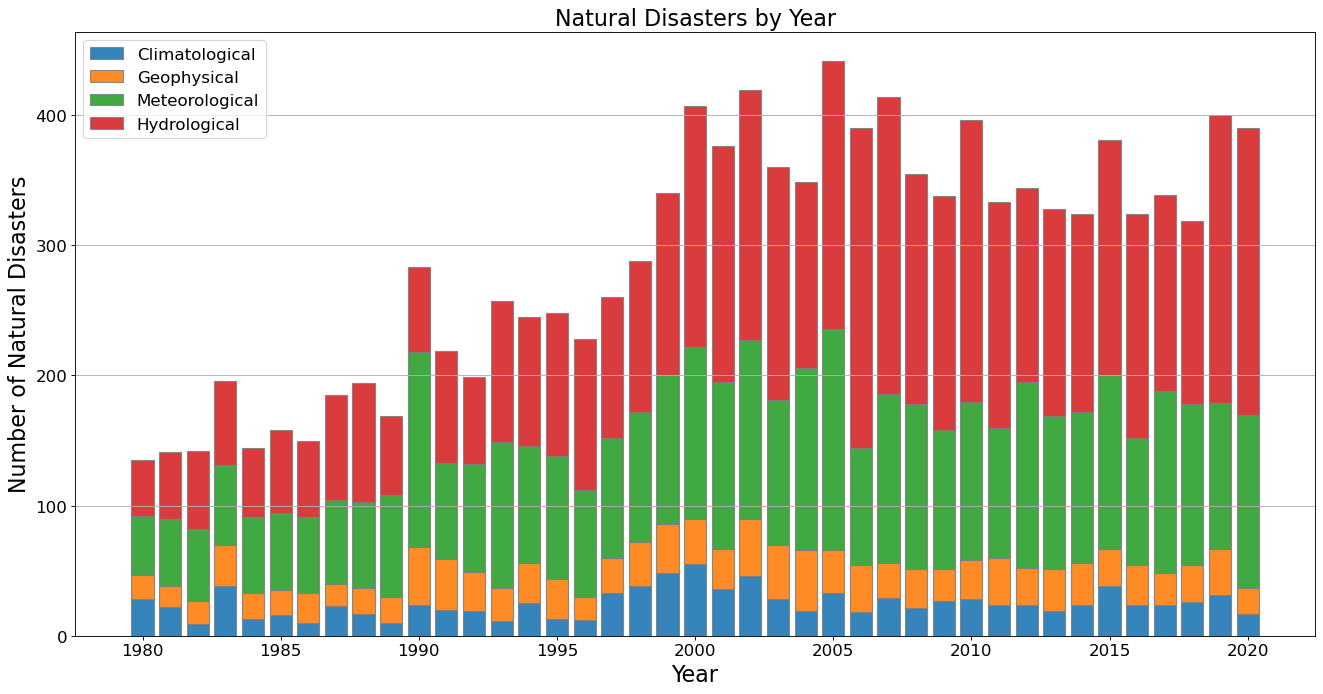

In [22]:
# bar chart

bottom1 = climatological_disaster_counts
bottom2 = np.add(bottom1, geophysical_disaster_counts).tolist()
bottom3 = np.add(bottom2, meteorological_disaster_counts).tolist()

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")

plt.bar(climatological_disaster_counts_index, climatological_disaster_counts, edgecolor = 'grey', alpha = 0.9)
plt.bar(geophysical_disaster_counts_index, geophysical_disaster_counts, bottom = bottom1, edgecolor = 'grey', alpha = 0.9)
plt.bar(meteorological_disaster_counts_index, meteorological_disaster_counts, bottom = bottom2, edgecolor = 'grey', alpha = 0.9)
plt.bar(hydrological_disaster_counts_index, hydrological_disaster_counts, bottom = bottom3, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Climatological', 'Geophysical', 'Meteorological',  'Hydrological'])

# BOXPLOT DISASTERS BY DECADE

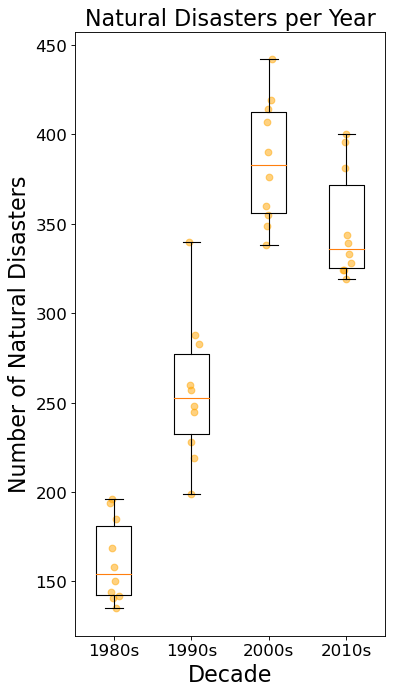

In [10]:
total_box_data = [disaster_counts[0:10], disaster_counts[10:20], disaster_counts[20:30], disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Natural Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Natural Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE DISASTER OCCURANCES

In [11]:
# total change 1980-2020
disasters_1980 = disaster_counts[1980]
disasters_2020 = disaster_counts[2020]
percent_change_1980_to_2020 = 100*(disasters_2020-disasters_1980)/disasters_1980
print("Total Disaster Change (1980-2020): {:.2f}%".format(percent_change_1980_to_2020))

# climatological change 1980-2020
climatological_disasters_1980 = climatological_disaster_counts[1980]
climatological_disasters_2020 = climatological_disaster_counts[2020]
percent_change_climatological_1980_to_2020 = 100*(climatological_disasters_2020-climatological_disasters_1980)/climatological_disasters_1980
print("Climatological Disaster Change (1980-2020): {:.2f}%".format(percent_change_climatological_1980_to_2020))

# geophysical change 1980-2020
geophysical_disasters_1980 = geophysical_disaster_counts[1980]
geophysical_disasters_2020 = geophysical_disaster_counts[2020]
percent_change_geophysical_1980_to_2020 = 100*(geophysical_disasters_2020-geophysical_disasters_1980)/geophysical_disasters_1980
print("Geophysical Disaster Change (1980-2020): {:.2f}%".format(percent_change_geophysical_1980_to_2020))

# meteorological change 1980-2020
meteorological_disasters_1980 = meteorological_disaster_counts[1980]
meteorological_disasters_2020 = meteorological_disaster_counts[2020]
percent_change_meteorological_1980_to_2020 = 100*(meteorological_disasters_2020-meteorological_disasters_1980)/meteorological_disasters_1980
print("Meteorological Disaster Change (1980-2020): {:.2f}%".format(percent_change_meteorological_1980_to_2020))

# hydrological change 1980-2020
hydrological_disasters_1980 = hydrological_disaster_counts[1980]
hydrological_disasters_2020 = hydrological_disaster_counts[2020]
percent_change_hydrological_1980_to_2020 = 100*(hydrological_disasters_2020-hydrological_disasters_1980)/hydrological_disasters_1980
print("Hydrological Disaster Change (1980-2020): {:.2f}%\n".format(percent_change_hydrological_1980_to_2020))

# total statistical data
print("\nTotal Statistical Data: ")
print(disaster_counts.describe())

# 1980s statistical data
print("\n1980s Statistical Data: ")
print(disaster_counts[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data: ")
print(disaster_counts[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data: ")
print(disaster_counts[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data: ")
print(disaster_counts[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s
total_mean_1980s = disaster_counts[0:10].mean()
total_mean_2010s = disaster_counts[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/total_mean_1980s
print("Mean Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_counts[0:10].max()
total_max_2010s = disaster_counts[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/total_max_1980s
print("Max Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_counts[0:10].min()
total_min_2010s = disaster_counts[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/total_min_1980s
print("Min Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_1980_to_2020))

# climatological statistical changes 1980s-2010s
climatological_mean_1980s = climatological_disaster_counts[0:10].mean()
climatological_mean_2010s = climatological_disaster_counts[30:40].mean()
mean_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_2010s-climatological_mean_1980s)/climatological_mean_1980s
print("Mean Climatological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_climatological_1980_to_2020))

climatological_max_1980s = climatological_disaster_counts[0:10].max()
climatological_max_2010s = climatological_disaster_counts[30:40].max()
max_percent_change_climatological_1980_to_2020 = 100*(climatological_max_2010s-climatological_max_1980s)/climatological_max_1980s
print("Max Climatological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_climatological_1980_to_2020))

climatological_min_1980s = climatological_disaster_counts[0:10].min()
climatological_min_2010s = climatological_disaster_counts[30:40].min()
min_percent_change_climatological_1980_to_2020 = 100*(climatological_min_2010s-climatological_min_1980s)/climatological_min_1980s
print("Min Climatological Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_climatological_1980_to_2020))

# geophysical statistical changes 1980s-2010s
geophysical_mean_1980s = geophysical_disaster_counts[0:10].mean()
geophysical_mean_2010s = geophysical_disaster_counts[30:40].mean()
mean_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_2010s-geophysical_mean_1980s)/geophysical_mean_1980s
print("Mean Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_geophysical_1980_to_2020))

geophysical_max_1980s = geophysical_disaster_counts[0:10].max()
geophysical_max_2010s = geophysical_disaster_counts[30:40].max()
max_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_2010s-geophysical_max_1980s)/geophysical_max_1980s
print("Max Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_geophysical_1980_to_2020))

geophysical_min_1980s = geophysical_disaster_counts[0:10].min()
geophysical_min_2010s = geophysical_disaster_counts[30:40].min()
min_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_2010s-geophysical_min_1980s)/geophysical_min_1980s
print("Min Geophysical Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_geophysical_1980_to_2020))

# meteorological statistical changes 1980s-2010s
meteorological_mean_1980s = meteorological_disaster_counts[0:10].mean()
meteorological_mean_2010s = meteorological_disaster_counts[30:40].mean()
mean_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_2010s-meteorological_mean_1980s)/meteorological_mean_1980s
print("Mean Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_meteorological_1980_to_2020))

meteorological_max_1980s = meteorological_disaster_counts[0:10].max()
meteorological_max_2010s = meteorological_disaster_counts[30:40].max()
max_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_2010s-meteorological_max_1980s)/meteorological_max_1980s
print("Max Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_meteorological_1980_to_2020))

meteorological_min_1980s = meteorological_disaster_counts[0:10].min()
meteorological_min_2010s = meteorological_disaster_counts[30:40].min()
min_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_2010s-meteorological_min_1980s)/meteorological_min_1980s
print("Min Meteorological Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_meteorological_1980_to_2020))

# hydrological statistical changes 1980s-2010s
hydrological_mean_1980s = hydrological_disaster_counts[0:10].mean()
hydrological_mean_2010s = hydrological_disaster_counts[30:40].mean()
mean_percent_change_hydrological_1980_to_2020 = 100*(hydrological_mean_2010s-hydrological_mean_1980s)/hydrological_mean_1980s
print("Mean Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_hydrological_1980_to_2020))

hydrological_max_1980s = hydrological_disaster_counts[0:10].max()
hydrological_max_2010s = hydrological_disaster_counts[30:40].max()
max_percent_change_hydrological_1980_to_2020 = 100*(hydrological_max_2010s-hydrological_max_1980s)/hydrological_max_1980s
print("Max Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_hydrological_1980_to_2020))

hydrological_min_1980s = hydrological_disaster_counts[0:10].min()
hydrological_min_2010s = hydrological_disaster_counts[30:40].min()
min_percent_change_hydrological_1980_to_2020 = 100*(hydrological_min_2010s-hydrological_min_1980s)/hydrological_min_1980s
print("Min Hydrological Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_hydrological_1980_to_2020))


Total Disaster Change (1980-2020): 188.89%
Climatological Disaster Change (1980-2020): -39.29%
Geophysical Disaster Change (1980-2020): 5.26%
Meteorological Disaster Change (1980-2020): 195.56%
Hydrological Disaster Change (1980-2020): 411.63%


Total Statistical Data: 
count     41.000000
mean     290.463415
std       93.564442
min      135.000000
25%      199.000000
50%      324.000000
75%      360.000000
max      442.000000
Name: Year, dtype: float64

1980s Statistical Data: 
count     10.000000
mean     161.400000
std       23.114209
min      135.000000
25%      142.500000
50%      154.000000
75%      181.000000
max      196.000000
Name: Year, dtype: float64

1990s Statistical Data: 
count     10.000000
mean     256.700000
std       40.011248
min      199.000000
25%      232.250000
50%      252.500000
75%      277.250000
max      340.000000
Name: Year, dtype: float64

2000s Statistical Data: 
count     10.000000
mean     385.000000
std       34.746702
min      338.000000
25%      3

# DISASTER SUBGROUP COSTS

In [12]:
disaster_costs = data[['Year', 'Total Damages']]
disaster_costs = disaster_costs.groupby('Year').sum()
disaster_costs = disaster_costs.squeeze()

climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
climatological_costs = climatological_costs.squeeze()

geophysical_costs = geophysical_data[['Year', 'Total Damages']]
geophysical_costs = geophysical_costs.groupby('Year').sum()
geophysical_costs = geophysical_costs.squeeze()

meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum().groupby('Year').sum()
meteorological_costs = meteorological_costs.squeeze()

hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()
hydrological_costs = hydrological_costs.squeeze()

In [13]:
japan_tsunami_2011_cost = 2.408585e+02
hurricane_harvey_2017_cost = 9.998350e+01
sichuan_earthquake_2008_cost = 1.018695e+02
hurricane_katrina_2005_cost = 1.651464e+02
izmit_earthquake_1999_cost = 3.097570e+01
kobe_earthquake_1995_cost = 1.692989e+02
irpinia_earthquake_1980_cost = 6.266630e+01

Text(1978.5, 72.6663, 'Irpinia Earthquake')

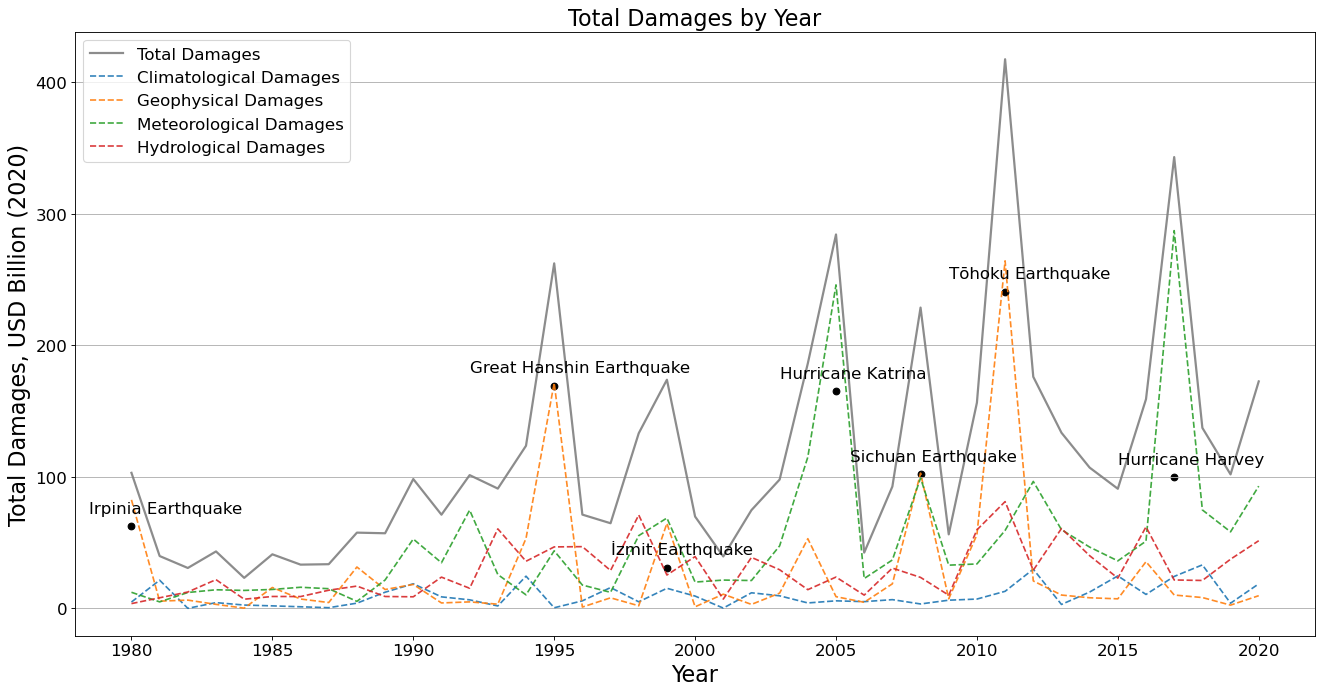

In [14]:
# line plot
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Total Damages by Year")
plt.xlabel("Year")
plt.ylabel("Total Damages, USD Billion (2020)")
plt.plot(disaster_costs.index, disaster_costs, linewidth=2, color = 'grey', alpha = 0.9)
plt.plot(climatological_costs.index, climatological_costs, linestyle = '--', alpha = 0.9)
plt.plot(geophysical_costs.index, geophysical_costs, linestyle = '--', alpha = 0.9)
plt.plot(meteorological_costs.index, meteorological_costs, linestyle = '--', alpha = 0.9)
plt.plot(hydrological_costs.index, hydrological_costs, linestyle = '--', alpha = 0.9)
plt.legend(['Total Damages', 'Climatological Damages', 'Geophysical Damages', 'Meteorological Damages',  'Hydrological Damages'])

plt.scatter([1980, 1995, 1999, 2005, 2008, 2011, 2017], [irpinia_earthquake_1980_cost, kobe_earthquake_1995_cost,izmit_earthquake_1999_cost,hurricane_katrina_2005_cost,sichuan_earthquake_2008_cost,japan_tsunami_2011_cost, hurricane_harvey_2017_cost], c='black')

plt.annotate("Tōhoku Earthquake", (2009, japan_tsunami_2011_cost+10))
plt.annotate("Hurricane Harvey", (2015, hurricane_harvey_2017_cost+10))
plt.annotate("Sichuan Earthquake", (2005.5, sichuan_earthquake_2008_cost+10))
plt.annotate("Hurricane Katrina", (2003, hurricane_katrina_2005_cost+10))
plt.annotate("İzmit Earthquake", (1997, izmit_earthquake_1999_cost+10))
plt.annotate("Great Hanshin Earthquake", (1992, kobe_earthquake_1995_cost+10))
plt.annotate("Irpinia Earthquake", (1978.5, irpinia_earthquake_1980_cost+10))

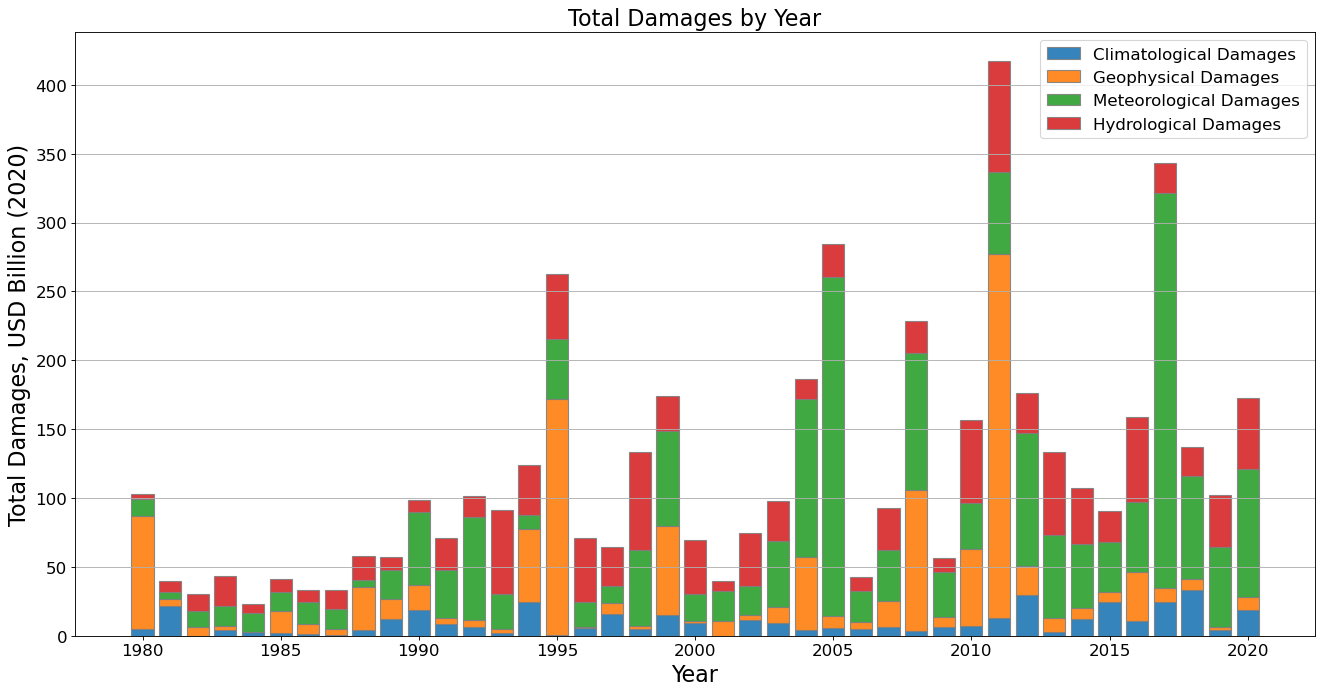

In [15]:
# bar chart

bottom1 = climatological_costs
bottom2 = np.add(bottom1, geophysical_costs).tolist()
bottom3 = np.add(bottom2, meteorological_costs).tolist()

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Total Damages by Year")
plt.xlabel("Year")
plt.ylabel("Total Damages, USD Billion (2020)")

plt.bar(climatological_costs.index, climatological_costs,  edgecolor='grey', alpha = 0.9)
plt.bar(geophysical_costs.index, geophysical_costs, bottom = bottom1,  edgecolor='grey', alpha = 0.9)
plt.bar(meteorological_costs.index, meteorological_costs, bottom = bottom2,  edgecolor='grey', alpha = 0.9)
plt.bar(hydrological_costs.index, hydrological_costs, bottom = bottom3,  edgecolor='grey', alpha = 0.9)
plt.legend(['Climatological Damages', 'Geophysical Damages', 'Meteorological Damages',  'Hydrological Damages'])

# BOXPLOT TOTAL DAMAGES BY DECADE

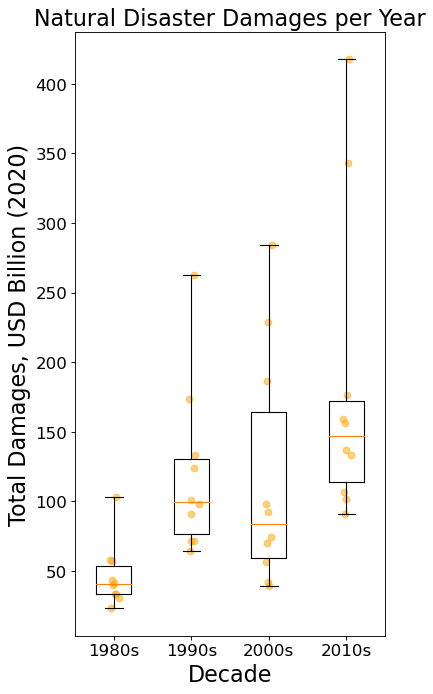

In [19]:
total_box_cost_data = [disaster_costs[0:10], disaster_costs[10:20], disaster_costs[20:30], disaster_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Natural Disaster Damages per Year")
plt.xlabel("Decade")
plt.ylabel("Total Damages, USD Billion (2020)")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_cost_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_cost_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_cost_data[3], color = 'orange', alpha = 0.5)


# ANALYZE DISASTER COSTS

In [17]:
# total cost change 1980-2020
disaster_costs_1980 = disaster_costs[1980]
disaster_costs_2020 = disaster_costs[2020]
cost_percent_change_1980_to_2020 = 100*(disaster_costs_2020-disaster_costs_1980)/disaster_costs_1980
print("Total Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_1980_to_2020))

# climatological change 1980-2020
climatological_costs_1980 = climatological_costs[1980]
climatological_costs_2020 = climatological_costs[2020]
cost_percent_change_climatological_1980_to_2020 = 100*(climatological_costs_2020-climatological_costs_1980)/climatological_costs_1980
print("Climatological Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_climatological_1980_to_2020))

# geophysical change 1980-2020
geophysical_costs_1980 = geophysical_costs[1980]
geophysical_costs_2020 = geophysical_costs[2020]
cost_percent_change_geophysical_1980_to_2020 = 100*(geophysical_costs_2020-geophysical_costs_1980)/geophysical_costs_1980
print("Geophysical Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_geophysical_1980_to_2020))

# meteorological change 1980-2020
meteorological_costs_1980 = meteorological_costs[1980]
meteorological_costs_2020 = meteorological_costs[2020]
cost_percent_change_meteorological_1980_to_2020 = 100*(meteorological_costs_2020-meteorological_costs_1980)/meteorological_costs_1980
print("Meteorological Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_meteorological_1980_to_2020))

# hydrological change 1980-2020
hydrological_costs_1980 = hydrological_costs[1980]
hydrological_costs_2020 = hydrological_costs[2020]
cost_percent_change_hydrological_1980_to_2020 = 100*(hydrological_costs_2020-hydrological_costs_1980)/hydrological_costs_1980
print("Hydrological Disaster Costs Change (1980-2020): {:.2f}%\n".format(cost_percent_change_hydrological_1980_to_2020))

# total costs statistical data
print("\nTotal Costs Statistical Data: ")
print(disaster_costs.describe())

# 1980s costs statistical data
print("\n1980s Costs Statistical Data: ")
print(disaster_costs[0:10].describe())

# 1990s costs statistical data
print("\n1990s Costs Statistical Data: ")
print(disaster_costs[10:20].describe())

# 2000s costs statistical data
print("\n2000s Costs Statistical Data: ")
print(disaster_costs[20:30].describe())

# 2010s costs statistical data
print("\n2010s Costs Statistical Data: ")
print(disaster_costs[30:40].describe())

print("\n")

# total costs statistical changes 1980s-2010s
total_mean_costs_1980s = disaster_costs[0:10].mean()
total_mean_costs_2010s = disaster_costs[30:40].mean()
mean_costs_percent_change_1980_to_2020 = 100*(total_mean_costs_2010s-total_mean_costs_1980s)/total_mean_costs_1980s
print("Mean Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_1980_to_2020))

total_max_costs_1980s = disaster_costs[0:10].max()
total_max_costs_2010s = disaster_costs[30:40].max()
max_costs_percent_change_1980_to_2020 = 100*(total_max_costs_2010s-total_max_costs_1980s)/total_max_costs_1980s
print("Max Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_1980_to_2020))

total_min_costs_1980s = disaster_costs[0:10].min()
total_min_costs_2010s = disaster_costs[30:40].min()
min_costs_percent_change_1980_to_2020 = 100*(total_min_costs_2010s-total_min_costs_1980s)/total_min_costs_1980s
print("Min Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_1980_to_2020))

# climatological costs statistical changes 1980s-2010s
climatological_mean_costs_1980s = climatological_costs[0:10].mean()
climatological_mean_costs_2010s = climatological_costs[30:40].mean()
mean_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_costs_2010s-climatological_mean_costs_1980s)/climatological_mean_costs_1980s
print("Mean Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_climatological_1980_to_2020))

climatological_max_costs_1980s = climatological_costs[0:10].max()
climatological_max_costs_2010s = climatological_costs[30:40].max()
max_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_max_costs_2010s-climatological_max_costs_1980s)/climatological_max_costs_1980s
print("Max Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_climatological_1980_to_2020))

climatological_min_costs_1980s = climatological_costs[0:10].min()
climatological_min_costs_2010s = climatological_costs[30:40].min()
min_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_min_costs_2010s-climatological_min_costs_1980s)/climatological_min_costs_1980s
print("Min Climatological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_climatological_1980_to_2020))

# geophysical costs statistical changes 1980s-2010s
geophysical_mean_costs_1980s = geophysical_costs[0:10].mean()
geophysical_mean_costs_2010s = geophysical_costs[30:40].mean()
mean_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_costs_2010s-geophysical_mean_costs_1980s)/geophysical_mean_costs_1980s
print("Mean Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_geophysical_1980_to_2020))

geophysical_max_costs_1980s = geophysical_costs[0:10].max()
geophysical_max_costs_2010s = geophysical_costs[30:40].max()
max_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_costs_2010s-geophysical_max_costs_1980s)/geophysical_max_costs_1980s
print("Max Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_geophysical_1980_to_2020))

geophysical_min_costs_1980s = geophysical_costs[0:10].min()
geophysical_min_costs_2010s = geophysical_costs[30:40].min()
min_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_costs_2010s-geophysical_min_costs_1980s)/geophysical_min_costs_1980s
print("Min Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_geophysical_1980_to_2020))

# meteorological costs statistical changes 1980s-2010s
meteorological_mean_costs_1980s = meteorological_costs[0:10].mean()
meteorological_mean_costs_2010s = meteorological_costs[30:40].mean()
mean_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_costs_2010s-meteorological_mean_costs_1980s)/meteorological_mean_costs_1980s
print("Mean Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_meteorological_1980_to_2020))

meteorological_max_costs_1980s = meteorological_costs[0:10].max()
meteorological_max_costs_2010s = meteorological_costs[30:40].max()
max_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_costs_2010s-meteorological_max_costs_1980s)/meteorological_max_costs_1980s
print("Max Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_meteorological_1980_to_2020))

meteorological_min_costs_1980s = meteorological_costs[0:10].min()
meteorological_min_costs_2010s = meteorological_costs[30:40].min()
min_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_costs_2010s-meteorological_min_costs_1980s)/meteorological_min_costs_1980s
print("Min Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_meteorological_1980_to_2020))

# hydrological costs statistical changes 1980s-2010s
hydrological_mean_costs_1980s = hydrological_costs[0:10].mean()
hydrological_mean_costs_2010s = hydrological_costs[30:40].mean()
mean_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_mean_costs_2010s-hydrological_mean_costs_1980s)/hydrological_mean_costs_1980s
print("Mean Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_hydrological_1980_to_2020))

hydrological_max_costs_1980s = hydrological_costs[0:10].max()
hydrological_max_costs_2010s = hydrological_costs[30:40].max()
max_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_max_costs_2010s-hydrological_max_costs_1980s)/hydrological_max_costs_1980s
print("Max Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_hydrological_1980_to_2020))

hydrological_min_costs_1980s = hydrological_costs[0:10].min()
hydrological_min_costs_2010s = hydrological_costs[30:40].min()
min_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_min_costs_2010s-hydrological_min_costs_1980s)/hydrological_min_costs_1980s
print("Min Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_hydrological_1980_to_2020))

Total Disaster Costs Change (1980-2020): 67.46%
Climatological Disaster Costs Change (1980-2020): 289.09%
Geophysical Disaster Costs Change (1980-2020): -88.34%
Meteorological Disaster Costs Change (1980-2020): 662.42%
Hydrological Disaster Costs Change (1980-2020): 1333.15%


Total Costs Statistical Data: 
count     41.000000
mean     117.590434
std       87.493362
min       23.166825
25%       57.083580
50%       97.940144
75%      156.394215
max      417.597259
Name: Total Damages, dtype: float64

1980s Costs Statistical Data: 
count     10.000000
mean      46.244717
std       22.743595
min       23.166825
25%       33.310139
50%       40.422289
75%       53.629089
max      103.053508
Name: Total Damages, dtype: float64

1990s Costs Statistical Data: 
count     10.000000
mean     119.085427
std       60.381245
min       64.701929
25%       76.215616
50%       99.809698
75%      130.768059
max      262.357447
Name: Total Damages, dtype: float64

2000s Costs Statistical Data: 
count  

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars
